# Case study  - Uber Data Analysis

**Data**: Different aspects of driving behavior  
The dataset contains-
- `Start Date` - the date and time of the start of the trip
- `End Date` - the date and time of the end of the trip
- `Start Location` - staring location of the trip 
- `End Location`  - location where the trip ended
- `Miles Driven`  - Total miles driven between the start and the end of the trip
- `Purpose of drive` - Purpose of the trip (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)

**Task**: Explore the dataset and provide insights.

In [2]:
import numpy as np
import pandas as pd

## Overview of the data

In [3]:
# Read the Data 
df = pd.read_csv('uberdrive.csv')

#---------------------------Other options with read_csv()----------------------#
# df = pd.read_csv('../data/uberdrive.csv', skiprows = 100)  # To skip first n nows 
# df = pd.read_csv('../data/uberdrive.csv', nrows = 100)  # Load only the first n rows
# df = pd.read_csv('../data/uberdrive.csv', usecols = ['START_DATE*', 'END_DATE*'])  # Load only selected columns

In [4]:
# View first 3 rows of data 

df.head(3) 

START_DATE*       END_DATE* CATEGORY*       START*        STOP*  MILES*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce  Fort Pierce     5.1   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce  Fort Pierce     5.0   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce  Fort Pierce     4.8   

          PURPOSE*  
0   Meal/Entertain  
1              NaN  
2  Errand/Supplies

In [5]:
# View the last 3 rows of data

df.tail(3)

START_DATE*         END_DATE* CATEGORY*      START*      STOP*  \
1153  12/31/2016 21:32  12/31/2016 21:50  Business  Katunayake    Gampaha   
1154  12/31/2016 22:08  12/31/2016 23:51  Business     Gampaha  Ilukwatta   
1155            Totals               NaN       NaN         NaN        NaN   

       MILES*        PURPOSE*  
1153      6.4  Temporary Site  
1154     48.2  Temporary Site  
1155  12204.7             NaN

In [6]:
df.tail(1).index

RangeIndex(start=1155, stop=1156, step=1)

In [7]:
# We do not need the last row for this analysis.
# Lets drop (remove) the last row from the dataframe

n = 1
df.drop(df.tail(n).index, inplace=True) # drop last n rows

# df.drop(1155, inplace=True)

# df = df[0:-1]



In [8]:
l = [1, 2, 3]
l[0:-1]

[1, 2]

In [9]:
df.tail(3)

START_DATE*         END_DATE* CATEGORY*            START*  \
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   

                 STOP*  MILES*        PURPOSE*  
1152  Unknown Location    16.2         Meeting  
1153           Gampaha     6.4  Temporary Site  
1154         Ilukwatta    48.2  Temporary Site

In [11]:
# understand shape and size of data 
# shape is (no. of rows, no. columns)
# size is no_of_rows * no_of_columns

print('Shape of the dataframe is: ', df.shape)
print('Size of the dataframe is:', df.size)

Shape of the dataframe is:  (1155, 7)
Size of the dataframe is: 8085


### Rename columns

In [12]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

In [14]:
# Create a python dictionary between old column names and new column names

col_rename_map = {
    'START_DATE*': 'start_datetime',
    'END_DATE*': 'end_datetime',
    'CATEGORY*': 'category',
    'START*': 'start_location',
    'STOP*': 'stop_location',
    'MILES*': 'miles_driven',
    'PURPOSE*': 'purpose'
}

# This approach is not practical if renaming has to be done for hunderds of columns.
# Programatically create new column names for larger datasets.

In [15]:
# Note ths use of the parameter `inplace`

df.rename(columns=col_rename_map, inplace=True)

In [14]:
df.columns

Index(['start_datetime', 'end_datetime', 'category', 'start_location',
       'stop_location', 'miles_driven', 'purpose'],
      dtype='object')

### Examine data types

In [16]:
df.head(2)

start_datetime    end_datetime  category start_location stop_location  \
0  1/1/2016 21:11  1/1/2016 21:17  Business    Fort Pierce   Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business    Fort Pierce   Fort Pierce   

   miles_driven         purpose  
0           5.1  Meal/Entertain  
1           5.0             NaN

In [17]:
# Get the datatype for each column of dataframe.

df.dtypes                           

start_datetime     object
end_datetime       object
category           object
start_location     object
stop_location      object
miles_driven      float64
purpose            object
dtype: object

<div class="alert alert-block alert-info">
Q) What does `object` datatype mean and why does this dataframe have columns with this data type?
</div>

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

In [18]:
# Convert columns into the datatype `datetime`

# df['start_datetime'] = pd.to_datetime(df['start_datetime'])
# df['end_datetime'] = pd.to_datetime(df['end_datetime'])

df['start_datetime'] = pd.to_datetime(df['start_datetime'], format='%m/%d/%Y %H:%M')
df['end_datetime'] = pd.to_datetime(df['end_datetime'], format='%m/%d/%Y %H:%M')

* `to_datetime`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
* datetime format options: https://strftime.org/

In [19]:
df.dtypes

start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
category                  object
start_location            object
stop_location             object
miles_driven             float64
purpose                   object
dtype: object

In [20]:
df = df.astype({
    'category': 'string',
    'start_location': 'string',
    'stop_location': 'string',
    'purpose': 'string'
})

In [21]:
df.dtypes

start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
category                  string
start_location            string
stop_location             string
miles_driven             float64
purpose                   string
dtype: object

### Identifying missing data 

In [22]:
# Check info about data 
# Includes column names, the number of non-null values in it, and data-type for each column.)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   start_datetime  1155 non-null   datetime64[ns]
 1   end_datetime    1155 non-null   datetime64[ns]
 2   category        1155 non-null   string        
 3   start_location  1155 non-null   string        
 4   stop_location   1155 non-null   string        
 5   miles_driven    1155 non-null   float64       
 6   purpose         653 non-null    string        
dtypes: datetime64[ns](2), float64(1), string(4)
memory usage: 72.2 KB


In [23]:
# Same as above, gives non-null number of records

df.count()

start_datetime    1155
end_datetime      1155
category          1155
start_location    1155
stop_location     1155
miles_driven      1155
purpose            653
dtype: int64

Notice that the column `purpose` has lesser non-null values than the rest of the columns. 

**How can we know if a dataframe has missing values?**

In [24]:
df.isnull()

start_datetime  end_datetime  category  start_location  stop_location  \
0              False         False     False           False          False   
1              False         False     False           False          False   
2              False         False     False           False          False   
3              False         False     False           False          False   
4              False         False     False           False          False   
...              ...           ...       ...             ...            ...   
1150           False         False     False           False          False   
1151           False         False     False           False          False   
1152           False         False     False           False          False   
1153           False         False     False           False          False   
1154           False         False     False           False          False   

      miles_driven  purpose  
0            False    False  
1            False     True  
2            False    False  
3            False    False  
4            False    False  
...            ...      ...  
1150         False    False  
1151         False    False  
1152         False    False  
1153         False    False  
1154         False    False  

[1155 rows x 7 columns]

**Notice how we are CHAINING dataframes**

In [25]:
df.isnull().any()

# df2 = df.isnul()
# df3 =  df2.any()

start_datetime    False
end_datetime      False
category          False
start_location    False
stop_location     False
miles_driven      False
purpose            True
dtype: bool

From the above output we know that the column `purpose` has missing values.

**Calculate the number of missing values in each column of a dataframe**

In [26]:
# True is 1 and False is 0 for arithmatic operations

df.isnull().sum()

start_datetime      0
end_datetime        0
category            0
start_location      0
stop_location       0
miles_driven        0
purpose           502
dtype: int64

### Filtering a dataframe

**Show the records where the column `purpose` has missing values**

hint: use boolean indexing

In [30]:
df.head(2)

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   

  stop_location  miles_driven         purpose  
0   Fort Pierce           5.1  Meal/Entertain  
1   Fort Pierce           5.0            <NA>

In [27]:
# Step-1
# Get a boolean Series, which indicates which row-index has missing values in the column `purpose` 

purpose_null_bool_series = df['purpose'].isnull()
purpose_null_bool_series

0       False
1        True
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: purpose, Length: 1155, dtype: bool

In [29]:
# Step-2
# Use boolean indexing to filter the dataframe 

df[purpose_null_bool_series]

# Single step...
# df[df['purpose'].isnull()].head()

# Consider using `df.loc[]`

start_datetime        end_datetime  category    start_location  \
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
32   2016-01-19 09:09:00 2016-01-19 09:23:00  Business       Whitebridge   
85   2016-02-09 10:54:00 2016-02-09 11:07:00  Personal       Whitebridge   
86   2016-02-09 11:43:00 2016-02-09 11:50:00  Personal        Northwoods   
87   2016-02-09 13:36:00 2016-02-09 13:52:00  Personal        Tanglewood   
...                  ...                 ...       ...               ...   
1065 2016-12-19 14:18:00 2016-12-19 14:32:00  Business  Unknown Location   
1066 2016-12-19 14:37:00 2016-12-19 14:50:00  Business  Unknown Location   
1069 2016-12-19 19:05:00 2016-12-19 19:17:00  Business         Islamabad   
1071 2016-12-20 08:49:00 2016-12-20 09:24:00  Business  Unknown Location   
1143 2016-12-29 20:53:00 2016-12-29 21:42:00  Business           Kar?chi   

            stop_location  miles_driven purpose  
1             Fort Pierce           5.0    <NA>  
32    Lake Wellingborough           7.2    <NA>  
85             Northwoods           5.3    <NA>  
86             Tanglewood           3.0    <NA>  
87                Preston           5.1    <NA>  
...                   ...           ...     ...  
1065     Unknown Location           5.3    <NA>  
1066     Unknown Location           5.4    <NA>  
1069     Unknown Location           2.2    <NA>  
1071           Rawalpindi          12.0    <NA>  
1143     Unknown Location           6.4    <NA>  

[502 rows x 7 columns]

In [30]:
# Inverting the selection ( not null ) ( works for booleans cases)
# using the ~, we invert the selection done in the above methods. 
# Here only the records where the purpose is not null will show up.


df[~purpose_null_bool_series].head()

start_datetime        end_datetime  category   start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit  
5  West Palm Beach           4.3   Meal/Entertain

In [31]:
# Filter based on any condition 

df[df['miles_driven'] > 30].head()

start_datetime        end_datetime  category start_location  \
4   2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   
36  2016-01-20 13:25:00 2016-01-20 14:19:00  Business        Raleigh   
108 2016-02-16 03:21:00 2016-02-16 04:13:00  Business     Katunayaka   
232 2016-03-17 12:52:00 2016-03-17 15:11:00  Business         Austin   
233 2016-03-17 15:16:00 2016-03-17 15:58:00  Business           Katy   

        stop_location  miles_driven         purpose  
4     West Palm Beach          63.7  Customer Visit  
36               Cary          40.2  Customer Visit  
108  Unknown Location          43.7  Customer Visit  
232              Katy         136.0  Customer Visit  
233           Houston          30.2         Meeting

## Identify the ride (row in the dataframe) that was driven for largest distance?
hint: use boolean indexing

In [32]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
1      Fort Pierce           5.0             <NA>  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit

In [33]:
max_miles_driven = df['miles_driven'].max()
max_miles_driven

310.3

In [34]:
mask = (df['miles_driven'] == max_miles_driven)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: miles_driven, Length: 1155, dtype: bool

In [35]:
df[mask]

start_datetime        end_datetime  category start_location  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business          Latta   

    stop_location  miles_driven         purpose  
269  Jacksonville         310.3  Customer Visit

In [36]:
# df[df['miles_driven'] == max_miles_driven]

df.loc[mask, :]

start_datetime        end_datetime  category start_location  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business          Latta   

    stop_location  miles_driven         purpose  
269  Jacksonville         310.3  Customer Visit

## Display the top 10 rides based on no. of miles driven

In [37]:
df.sort_values(by=['miles_driven'], ascending=False).head(10)

start_datetime        end_datetime  category    start_location  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business             Latta   
270 2016-03-25 22:54:00 2016-03-26 01:39:00  Business      Jacksonville   
881 2016-10-30 15:22:00 2016-10-30 18:23:00  Business         Asheville   
776 2016-09-27 21:01:00 2016-09-28 02:37:00  Business  Unknown Location   
546 2016-07-14 16:39:00 2016-07-14 20:05:00  Business       Morrisville   
559 2016-07-17 12:20:00 2016-07-17 15:25:00  Personal             Boone   
297 2016-04-02 19:38:00 2016-04-02 22:36:00  Business      Jacksonville   
299 2016-04-03 02:00:00 2016-04-03 04:16:00  Business          Florence   
727 2016-08-27 16:15:00 2016-08-27 19:13:00  Business  Unknown Location   
268 2016-03-25 13:24:00 2016-03-25 16:22:00  Business              Cary   

        stop_location  miles_driven         purpose  
269      Jacksonville         310.3  Customer Visit  
270         Kissimmee         201.0         Meeting  
881            Mebane         195.9            <NA>  
776  Unknown Location         195.6            <NA>  
546        Banner Elk         195.3            <NA>  
559              Cary         180.2         Commute  
297         Ridgeland         174.2  Customer Visit  
299              Cary         159.3         Meeting  
727  Unknown Location         156.9            <NA>  
268             Latta         144.0  Customer Visit

-------------------------------------------------------------------------

## Identify all the unique start and stop points of rides.

In [41]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
1      Fort Pierce           5.0             <NA>  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit

In [38]:
print('Unique starting locations:')
print(df['start_location'].unique())
print()
print('----------------------------------------------------')
print()
print('Unique stopping locations:')
print(df['stop_location'].unique())

Unique starting locations:
<StringArray>
[      'Fort Pierce',   'West Palm Beach',              'Cary',
           'Jamaica',          'New York',          'Elmhurst',
           'Midtown',       'East Harlem', 'Flatiron District',
      'Midtown East',
 ...
    'South Berkeley',     'Mountain View',        'El Cerrito',
     'Krendle Woods',          'Wake Co.',     'Fuquay-Varina',
        'Rawalpindi',           'Kar?chi',        'Katunayake',
           'Gampaha']
Length: 177, dtype: string

----------------------------------------------------

Unique stopping locations:
<StringArray>
[       'Fort Pierce',    'West Palm Beach',         'Palm Beach',
               'Cary',        'Morrisville',           'New York',
             'Queens',        'East Harlem',              'NoMad',
            'Midtown',
 ...
 'Southwest Berkeley',     'South Berkeley',      'Mountain View',
         'El Cerrito',           'Wake Co.',      'Fuquay-Varina',
         'Rawalpindi',            'Kar?c

**Consider using python sets to identify unqiue values**

## How many unique start and stop points are in the dataframe

In [39]:
print('No. of unique starting locations:')
print(df['start_location'].nunique())
print()
print('----------------------------------------------------')
print()
print('No. of unique stopping locations:')
print(df['stop_location'].nunique())

No. of unique starting locations:
177

----------------------------------------------------

No. of unique stopping locations:
188


## Identify start locations that have large no. of rides. Display the top 10 such start locations.

In [47]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
1      Fort Pierce           5.0             <NA>  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit

In [40]:
df['start_location'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
El Cerrito            1
Bellevue              1
Meredith              1
Hell's Kitchen        1
Coxville              1
Name: start_location, Length: 177, dtype: Int64

In [41]:
df['start_location'].value_counts().head(10)

# Deafult parameter is ascending=False. 

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: start_location, dtype: Int64

In [42]:
df['stop_location'].value_counts().head(10)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: stop_location, dtype: Int64

## Display rides where the start and the stop location are the same

In [48]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
1      Fort Pierce           5.0             <NA>  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit

In [43]:
df[df['start_location'] == df['stop_location']]


# boolean_mask = df['start_location'] == df['stop_location']
# df[boolean_mask]


start_datetime        end_datetime  category    start_location  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
5    2016-01-06 17:15:00 2016-01-06 17:19:00  Business   West Palm Beach   
...                  ...                 ...       ...               ...   
1147 2016-12-30 15:41:00 2016-12-30 16:03:00  Business           Kar?chi   
1148 2016-12-30 16:45:00 2016-12-30 17:08:00  Business           Kar?chi   
1149 2016-12-30 23:06:00 2016-12-30 23:10:00  Business           Kar?chi   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   

         stop_location  miles_driven          purpose  
0          Fort Pierce           5.1   Meal/Entertain  
1          Fort Pierce           5.0             <NA>  
2          Fort Pierce           4.8  Errand/Supplies  
3          Fort Pierce           4.7          Meeting  
5      West Palm Beach           4.3   Meal/Entertain  
...                ...           ...              ...  
1147           Kar?chi           4.6  Errand/Supplies  
1148           Kar?chi           4.6          Meeting  
1149           Kar?chi           0.8   Customer Visit  
1150           Kar?chi           0.7          Meeting  
1152  Unknown Location          16.2          Meeting  

[288 rows x 7 columns]

## What are the starting locations with large no. of total miles covered. Display the top 10.

Hint: use groupby()

In [40]:
df.head(3)

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   

  stop_location  miles_driven          purpose  
0   Fort Pierce           5.1   Meal/Entertain  
1   Fort Pierce           5.0             <NA>  
2   Fort Pierce           4.8  Errand/Supplies

In [44]:
# Consider using paranthesis when chaining

(df.groupby(['start_location'])['miles_driven']
    .sum()
    .sort_values(ascending = False )
    .head(10)
)


# df.groupby(['start_location'])['miles_driven'].sum().sort_values(ascending = False).head(10)

start_location
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: miles_driven, dtype: float64

In [45]:
df.groupby('start_location').agg(
    sum_miles=pd.NamedAgg(column='miles_driven', aggfunc=sum),
).sort_values(by='sum_miles', ascending=False).head(10)


sum_miles
start_location             
Unknown Location     1976.5
Cary                 1791.3
Morrisville           671.7
Raleigh               433.0
Islamabad             401.2
Durham                384.4
Jacksonville          375.2
Latta                 310.3
Asheville             287.7
Whitebridge           273.4

## Find the top 10 start_location - stop_location pairs that have the most miles covered between them.


For ex: Compare total airmiles between the pairs (Huston - Austin) and (Wako - Austin).

Hint: use groupby()

In [43]:
df.head(3)

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   

  stop_location  miles_driven          purpose  
0   Fort Pierce           5.1   Meal/Entertain  
1   Fort Pierce           5.0             <NA>  
2   Fort Pierce           4.8  Errand/Supplies

In [53]:
boolean_mask = (
    (df['start_location'] != 'Unknown Location') & 
    (df['stop_location'] != 'Unknown Location')
)

boolean_mask

0        True
1        True
2        True
3        True
4        True
        ...  
1150     True
1151    False
1152    False
1153     True
1154     True
Length: 1155, dtype: boolean

In [54]:
rides_no_unknown_location = df[boolean_mask]
rides_no_unknown_location

start_datetime        end_datetime  category start_location  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   
...                  ...                 ...       ...            ...   
1148 2016-12-30 16:45:00 2016-12-30 17:08:00  Business        Kar?chi   
1149 2016-12-30 23:06:00 2016-12-30 23:10:00  Business        Kar?chi   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business        Kar?chi   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business     Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business        Gampaha   

        stop_location  miles_driven          purpose  
0         Fort Pierce           5.1   Meal/Entertain  
1         Fort Pierce           5.0             <NA>  
2         Fort Pierce           4.8  Errand/Supplies  
3         Fort Pierce           4.7          Meeting  
4     West Palm Beach          63.7   Customer Visit  
...               ...           ...              ...  
1148          Kar?chi           4.6          Meeting  
1149          Kar?chi           0.8   Customer Visit  
1150          Kar?chi           0.7          Meeting  
1153          Gampaha           6.4   Temporary Site  
1154        Ilukwatta          48.2   Temporary Site  

[944 rows x 7 columns]

In [55]:
groupby_colnames = ['start_location','stop_location']
location_pair_groupby_df = (rides_no_unknown_location.groupby(by=groupby_colnames)['miles_driven']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

location_pair_groupby_df

start_location  stop_location
Morrisville     Cary             395.7
Cary            Durham           390.0
                Morrisville      380.0
Raleigh         Cary             365.7
Cary            Raleigh          336.5
Durham          Cary             334.4
Latta           Jacksonville     310.3
Cary            Cary             255.9
Jacksonville    Kissimmee        201.0
Asheville       Mebane           195.9
Name: miles_driven, dtype: float64

In [56]:

# rides_no_unknown_location.groupby(by=groupby_colnames).agg(
#     sum_miles=pd.NamedAgg(column='miles_driven', aggfunc=sum),
# ).sort_values(by='sum_miles', ascending=False).head(10)


In [57]:
type(location_pair_groupby_df)

pandas.core.series.Series

In [58]:
location_pair_groupby_df = location_pair_groupby_df.reset_index()
location_pair_groupby_df

start_location stop_location  miles_driven
0    Morrisville          Cary         395.7
1           Cary        Durham         390.0
2           Cary   Morrisville         380.0
3        Raleigh          Cary         365.7
4           Cary       Raleigh         336.5
5         Durham          Cary         334.4
6          Latta  Jacksonville         310.3
7           Cary          Cary         255.9
8   Jacksonville     Kissimmee         201.0
9      Asheville        Mebane         195.9

In [59]:
type(location_pair_groupby_df)

pandas.core.frame.DataFrame

In [64]:
# Create a new column with location pairs for visualization

location_pair_groupby_df['start-stop'] = (
    location_pair_groupby_df['start_location'] + 
    ' - ' + 
    location_pair_groupby_df['stop_location']
)

In [65]:
location_pair_groupby_df

start_location stop_location  miles_driven                start-stop
0    Morrisville          Cary         395.7        Morrisville - Cary
1           Cary        Durham         390.0             Cary - Durham
2           Cary   Morrisville         380.0        Cary - Morrisville
3        Raleigh          Cary         365.7            Raleigh - Cary
4           Cary       Raleigh         336.5            Cary - Raleigh
5         Durham          Cary         334.4             Durham - Cary
6          Latta  Jacksonville         310.3      Latta - Jacksonville
7           Cary          Cary         255.9               Cary - Cary
8   Jacksonville     Kissimmee         201.0  Jacksonville - Kissimmee
9      Asheville        Mebane         195.9        Asheville - Mebane

#  Manipulating date & time objects

Refernce: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

Look at the attributes and methods of Timestamp object

How do we answer the following questions:
- Which month did he get most rides?
- Which months did he get largest no. of miles riden?
- What is the average distance covered on each month?

In [46]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  
0      Fort Pierce           5.1   Meal/Entertain  
1      Fort Pierce           5.0             <NA>  
2      Fort Pierce           4.8  Errand/Supplies  
3      Fort Pierce           4.7          Meeting  
4  West Palm Beach          63.7   Customer Visit

In [47]:
df.dtypes

start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
category                  string
start_location            string
stop_location             string
miles_driven             float64
purpose                   string
dtype: object

In [48]:
df['start_datetime'].dt.day

0        1
1        2
2        2
3        5
4        6
        ..
1150    31
1151    31
1152    31
1153    31
1154    31
Name: start_datetime, Length: 1155, dtype: int64

In [49]:
df['start_datetime'].dt.day.unique()

array([ 1,  2,  5,  6,  7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 26, 27,
       28, 29, 30,  4,  8,  9, 16, 17, 22, 24, 25,  3, 23, 31])

In [50]:
df['start_datetime'].dt.hour.unique()

array([21,  1, 20, 17, 14, 13,  8, 12, 15, 18, 19, 11, 16,  0,  9, 10, 23,
        3,  7,  5, 22,  6,  2])

In [51]:
df['start_datetime'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [52]:
df['start_datetime'].dt.dayofweek.unique()

# Days encoded as 0-6  ( monday =0, Tue =1 .... )

array([4, 5, 1, 2, 3, 6, 0])

In [53]:
df['start_datetime'].dt.day_name().unique()

array(['Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday'], dtype=object)

In [54]:
df['start_datetime'].dt.month_name().unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [55]:
# Create more columns by using the inbuilt functionalities of datatime module

df['start_day'] = df['start_datetime'].dt.day
df['start_hour'] = df['start_datetime'].dt.hour
df['start_month'] = df['start_datetime'].dt.month
df['cal_month'] = df['start_datetime'].dt.month_name()
df['d_of_wk'] = df['start_datetime'].dt.dayofweek
df['weekday'] = df['start_datetime'].dt.day_name()

In [56]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  start_day  start_hour  \
0      Fort Pierce           5.1   Meal/Entertain          1          21   
1      Fort Pierce           5.0             <NA>          2           1   
2      Fort Pierce           4.8  Errand/Supplies          2          20   
3      Fort Pierce           4.7          Meeting          5          17   
4  West Palm Beach          63.7   Customer Visit          6          14   

   start_month cal_month  d_of_wk    weekday  
0            1   January        4     Friday  
1            1   January        5   Saturday  
2            1   January        5   Saturday  
3            1   January        1    Tuesday  
4            1   January        2  Wednesday

<div class="alert alert-block alert-info">
    <b>Q) Which month did he get most rides?
</div>

In [79]:
(df.groupby(['cal_month'])
     .size()  # count()
     .sort_values(ascending=False)
)

cal_month
December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
dtype: int64

<div class="alert alert-block alert-info">
    <b>Q) Which months did he get largest no. of miles riden?
</div>

In [80]:
(df.groupby('cal_month')
     .sum()['miles_driven']
     .sort_values(ascending = False)
)

cal_month
October      1810.0
March        1693.9
August       1335.5
July         1224.6
April        1113.0
December      981.3
February      908.2
June          842.8
November      816.9
September     601.8
January       512.9
May           363.8
Name: miles_driven, dtype: float64

<div class="alert alert-block alert-info">
    <b>Q) What is the average distance covered on each month?
</div>

In [81]:
(df.groupby('cal_month')
     .mean()['miles_driven']
     .sort_values(ascending = False)
)

cal_month
April        20.611111
October      17.075472
September    16.716667
March        14.990265
July         10.933929
August       10.041353
January       8.408197
February      7.897391
June          7.803704
May           7.424490
December      6.721233
November      6.695902
Name: miles_driven, dtype: float64

## Visualize no. of rides as a function of hour-of-day

In [57]:
# Note: not sorting the result

rides_at_hour = df.groupby('start_hour').size()
rides_at_hour

start_hour
0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
dtype: int64

In [58]:
rides_at_hour_df = rides_at_hour.reset_index()
rides_at_hour_df

start_hour   0
0            0  19
1            1   5
2            2   2
3            3   3
4            5   4
5            6   4
6            7  13
7            8  35
8            9  51
9           10  65
10          11  72
11          12  77
12          13  94
13          14  89
14          15  98
15          16  88
16          17  95
17          18  94
18          19  68
19          20  71
20          21  51
21          22  31
22          23  26

In [153]:
rides_at_hour_df.columns = ['start_hour', 'no_of_rides']
rides_at_hour_df.head()

start_hour  no_of_rides
0           0           19
1           1            5
2           2            2
3           3            3
4           5            4

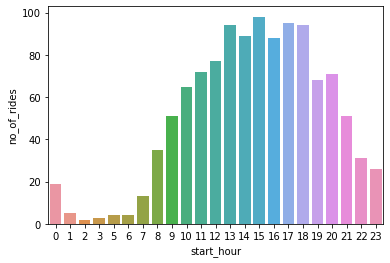

In [70]:
sns.barplot(data=rides_at_hour_df , x ='start_hour' , y = 'no_of_rides')

## What should we do to analyze the duration of the rides

In [154]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  start_day  start_hour  \
0      Fort Pierce           5.1   Meal/Entertain          1          21   
1      Fort Pierce           5.0             <NA>          2           1   
2      Fort Pierce           4.8  Errand/Supplies          2          20   
3      Fort Pierce           4.7          Meeting          5          17   
4  West Palm Beach          63.7   Customer Visit          6          14   

   start_month cal_month  d_of_wk    weekday  
0            1   January        4     Friday  
1            1   January        5   Saturday  
2            1   January        5   Saturday  
3            1   January        1    Tuesday  
4            1   January        2  Wednesday

In [62]:
df['duration'] = df['end_datetime'] - df['start_datetime']

colnames = ['start_datetime', 'end_datetime', 'duration']
df.loc[:, colnames]


# df[['start_datetime', 'end_datetime', 'duration']]

start_datetime        end_datetime        duration
0    2016-01-01 21:11:00 2016-01-01 21:17:00 0 days 00:06:00
1    2016-01-02 01:25:00 2016-01-02 01:37:00 0 days 00:12:00
2    2016-01-02 20:25:00 2016-01-02 20:38:00 0 days 00:13:00
3    2016-01-05 17:31:00 2016-01-05 17:45:00 0 days 00:14:00
4    2016-01-06 14:42:00 2016-01-06 15:49:00 0 days 01:07:00
...                  ...                 ...             ...
1150 2016-12-31 01:07:00 2016-12-31 01:14:00 0 days 00:07:00
1151 2016-12-31 13:24:00 2016-12-31 13:42:00 0 days 00:18:00
1152 2016-12-31 15:03:00 2016-12-31 15:38:00 0 days 00:35:00
1153 2016-12-31 21:32:00 2016-12-31 21:50:00 0 days 00:18:00
1154 2016-12-31 22:08:00 2016-12-31 23:51:00 0 days 01:43:00

[1155 rows x 3 columns]

`duration` is of the datatype `timedelta`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

In [63]:
df.dtypes

start_datetime     datetime64[ns]
end_datetime       datetime64[ns]
category                   string
start_location             string
stop_location              string
miles_driven              float64
purpose                    string
start_day                   int64
start_hour                  int64
start_month                 int64
cal_month                  object
d_of_wk                     int64
weekday                    object
duration          timedelta64[ns]
dtype: object

In [64]:
df['duration'].describe()

count                         1155
mean     0 days 00:23:14.597402597
std      0 days 00:27:19.096606181
min                0 days 00:00:00
25%                0 days 00:10:00
50%                0 days 00:16:00
75%                0 days 00:27:30
max                0 days 05:36:00
Name: duration, dtype: object

**There seems to be somethin strange with the minumum duration: it is 0**

In [65]:
df[df['duration'] == 0.0]

## This doesn't work because we are comparing timedelta object with a float. 
## Should create a time delta object with 0.0.

Empty DataFrame
Columns: [start_datetime, end_datetime, category, start_location, stop_location, miles_driven, purpose, start_day, start_hour, start_month, cal_month, d_of_wk, weekday, duration]
Index: []

In [66]:
df[df['duration'] == pd.Timedelta(0)]

start_datetime        end_datetime  category    start_location  \
751 2016-09-06 17:49:00 2016-09-06 17:49:00  Business  Unknown Location   
761 2016-09-16 07:08:00 2016-09-16 07:08:00  Business  Unknown Location   
798 2016-10-08 15:03:00 2016-10-08 15:03:00  Business           Karachi   
807 2016-10-13 13:02:00 2016-10-13 13:02:00  Business         Islamabad   

        stop_location  miles_driven purpose  start_day  start_hour  \
751  Unknown Location          69.1    <NA>          6          17   
761  Unknown Location           1.6    <NA>         16           7   
798           Karachi           3.6    <NA>          8          15   
807         Islamabad           0.7    <NA>         13          13   

     start_month  cal_month  d_of_wk   weekday duration  
751            9  September        1   Tuesday   0 days  
761            9  September        4    Friday   0 days  
798           10    October        5  Saturday   0 days  
807           10    October        3  Thursday   0 days

## Calculate Average speed of each ride

In [67]:
df['duration_mins'] = df['duration'].astype('timedelta64[m]')
df['duration_mins']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: duration_mins, Length: 1155, dtype: float64

In [68]:
df['duration_hours'] = df['duration_mins'] / 60
df['speed_mph'] = df['miles_driven'] / df['duration_hours']
df['speed_mph']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
1154    28.077670
Name: speed_mph, Length: 1155, dtype: float64

##  What percentage of miles for each purpose?

In [69]:
df.head(3)

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   

  stop_location  miles_driven          purpose  start_day  start_hour  \
0   Fort Pierce           5.1   Meal/Entertain          1          21   
1   Fort Pierce           5.0             <NA>          2           1   
2   Fort Pierce           4.8  Errand/Supplies          2          20   

   start_month cal_month  d_of_wk   weekday        duration  duration_mins  \
0            1   January        4    Friday 0 days 00:06:00            6.0   
1            1   January        5  Saturday 0 days 00:12:00           12.0   
2            1   January        5  Saturday 0 days 00:13:00           13.0   

   duration_hours  speed_mph  
0        0.100000  51.000000  
1        0.200000  25.000000  
2        0.216667  22.153846

In [70]:
# def my_func(x):
#     print(x)
    
# lambda x : print(x)

In [71]:
miles_per_porpose = df.groupby(['purpose'])['miles_driven'].sum()
miles_per_porpose

purpose
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: miles_driven, dtype: float64

In [72]:
sum_miles = df1.sum()

def percent_miles(miles_ride):
    return (miles_ride / sum_miles) * 100
    

NameError: name 'df1' is not defined

In [118]:
miles_per_porpose.apply(percent_miles).rename(columns = {'sum_miles':'% of miles'})

% of miles
purpose                    
Airport/Travel     0.225681
Between Offices    2.694496
Charity ($)        0.206532
Commute            2.464712
Customer Visit    28.579440
Errand/Supplies    6.948244
Meal/Entertain    12.469909
Meeting           38.999070
Moving             0.248933
Temporary Site     7.162983

## How much time was spend for drives per purpose?

In [60]:
df.head()

start_datetime        end_datetime  category start_location  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business    Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business    Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business    Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business    Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business    Fort Pierce   

     stop_location  miles_driven          purpose  start_day  start_hour  \
0      Fort Pierce           5.1   Meal/Entertain          1          21   
1      Fort Pierce           5.0             <NA>          2           1   
2      Fort Pierce           4.8  Errand/Supplies          2          20   
3      Fort Pierce           4.7          Meeting          5          17   
4  West Palm Beach          63.7   Customer Visit          6          14   

   start_month cal_month  d_of_wk    weekday        duration  
0            1   January        4     Friday 0 days 00:06:00  
1            1   January        5   Saturday 0 days 00:12:00  
2            1   January        5   Saturday 0 days 00:13:00  
3            1   January        1    Tuesday 0 days 00:14:00  
4            1   January        2  Wednesday 0 days 01:07:00

In [77]:
df_2 = df[['start_day', 'start_hour']]

In [78]:
df_2

start_day  start_hour
0             1          21
1             2           1
2             2          20
3             5          17
4             6          14
...         ...         ...
1150         31           1
1151         31          13
1152         31          15
1153         31          21
1154         31          22

[1155 rows x 2 columns]

In [79]:
df_2.applymap(np.square)

start_day  start_hour
0             1         441
1             4           1
2             4         400
3            25         289
4            36         196
...         ...         ...
1150        961           1
1151        961         169
1152        961         225
1153        961         441
1154        961         484

[1155 rows x 2 columns]

In [73]:

duration_per_purpose = df.groupby('purpose').sum()['duration_mins'].sort_values(ascending = False)
duration_per_purpose

# Output is in minutes.

purpose
Meeting            5561.0
Customer Visit     3375.0
Meal/Entertain     2580.0
Errand/Supplies    1661.0
Temporary Site     1293.0
Between Offices     459.0
Commute             185.0
Airport/Travel       78.0
Moving               60.0
Charity ($)          27.0
Name: duration_mins, dtype: float64

In [74]:
type(duration_per_purpose)

pandas.core.series.Series

In [75]:
duration_per_purpose.apply(lambda col: col / 60)  # in hours

purpose
Meeting            92.683333
Customer Visit     56.250000
Meal/Entertain     43.000000
Errand/Supplies    27.683333
Temporary Site     21.550000
Between Offices     7.650000
Commute             3.083333
Airport/Travel      1.300000
Moving              1.000000
Charity ($)         0.450000
Name: duration_mins, dtype: float64

In [76]:
duration_per_purpose / 60

purpose
Meeting            92.683333
Customer Visit     56.250000
Meal/Entertain     43.000000
Errand/Supplies    27.683333
Temporary Site     21.550000
Between Offices     7.650000
Commute             3.083333
Airport/Travel      1.300000
Moving              1.000000
Charity ($)         0.450000
Name: duration_mins, dtype: float64

# END